# 3.7.6 K Nearest Neighbor 모델

In [2]:
# 참조 코딩: 파이썬 버전 확인 코딩

from platform import python_version
print(python_version())

3.9.7


Automatically created module for IPython interactive environment


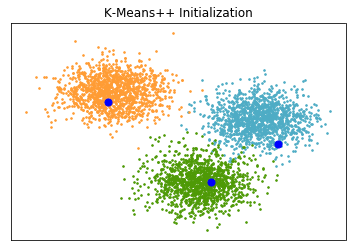

In [37]:
# 참조 코딩: K-means 시각화

print(__doc__)

from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 3

X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X = X[:, ::-1]

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=3,
                                        random_state=0)

# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('stroke-standard.csv')
df.shape

(3915, 16)

In [2]:
data = df.drop(['stroke'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['stroke']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler    # RandomUnderSampler를 import
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2) 
                                                          # 타겟변수의 소수 클래스 및 다수 클래스를
                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target)
                                                          # data 및 target에 언더샘플링 적용

In [3]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (386, 15)
X_test shape: (386, 15)


In [11]:
# 참조 코딩
print(X_train)

          age  avg_glucose_level       bmi hypertension heart_disease  \
914  0.936508           0.025621  0.237843            0             0   
61   0.666667           0.342489  0.240397            0             0   
116  0.428571           0.578571  0.138786            0             0   
266  0.603175           0.371665  0.308550            0             0   
936  0.809524           0.865109  0.423792            1             0   
..        ...                ...       ...          ...           ...   
86   0.285714           0.686409  0.437423            0             0   
335  0.666667           0.025344  0.163569            0             0   
789  0.984127           0.204090  0.277571            0             0   
181  0.952381           0.110978  0.291202            0             0   
959  0.857143           0.759902  0.214374            0             1   

    ever_married_encoded residence_type_encoded gender_encoded_1.0  \
914                  1.0                    0.0      

In [4]:
# KNN 모델 (Default 모델 with n_neighbors=3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_knn = KNeighborsClassifier(n_neighbors=3) # random_state 파라미터가 없음에 주의!
clf_knn.fit(X_train, y_train)
pred = clf_knn.predict(X_test)   # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("KNN Training set score:{:.5f}".format(clf_knn.score(X_train, y_train))) 
print ("KNN Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

KNN Training set score:0.84456
KNN Test set score:0.74352


In [5]:
# KNN 모델 (Default 모델 with n_neighbors=3)
clf_knn = KNeighborsClassifier(n_neighbors=3) # random_state 파라미터가 없음에 주의!

In [6]:
# 그리드 서치 실행

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(3, 31)}

grid_knn = GridSearchCV(clf_knn, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_knn.best_score_))
print("GridSearchCV best parameter:", (grid_knn.best_params_)) 

GridSearchCV max accuracy:0.77204
GridSearchCV best parameter: {'n_neighbors': 17}


In [7]:
best_clf = grid_knn.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.77720
